
# <span style="color:rgb(213,80,0)">exercise4\_histogram\_equalization\_darkroads.m</span>

Exercise 4 – Histogram Equalisation of night\-time road images


This script implements three types of processing:


1) Display original images and their histograms (grayscale)


2) Global histogram equalization using histeq


3) Local (adaptive) histogram equalization using adapthisteq (CLAHE)


Author: ANGELOS NIKOLAOS POTAMIANOS Date : MAY 2025


In [1]:
clear; close all; clc;

## \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\- Parameters \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

In [2]:
imgNames  = {'dark_road_1.jpg','dark_road_2.jpg','dark_road_3.jpg'};
imgFolder = fullfile('Images','Ασκηση 4');
numBins   = 256;          %% histogram bins for display
save_results = true;      %% flag to save result images

% CLAHE parameters
claheTiles = [8 8];       %% NumTiles for adapthisteq (≈ window size 32×32)
clipLimit  = 0.01;        %% CLAHE clip limit (0-1)

% Alternative window sizes to test
test_multiple_windows = true;
window_sizes = {[4 4], [8 8], [16 16]};  % Small, Medium, Large windows

## \-\-\-\-\-\-\-\-\-\-\-\-\-\-\- Utility functions for contrast metrics \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

Contrast measurement functions


In [3]:
global_contrast = @(img) std(double(img(:)));
local_contrast = @(img) mean(stdfilt(double(img), ones(3,3)), 'all');
entropy_fn = @(img) entropy(uint8(img));

% Print metrics in a formatted table
function print_metrics(img_names, orig_metrics, global_metrics, local_metrics)
    fprintf('\n=== Contrast Enhancement Metrics ===\n');
    fprintf('+-----------------+----------------+----------------+----------------+\n');
    fprintf('| Image           | Original       | Global EQ      | Local EQ       |\n');
    fprintf('+-----------------+----------------+----------------+----------------+\n');

    for i = 1:length(img_names)
        fprintf('| %-15s |', img_names{i});

        % Global contrast
        improvement = 100 * (global_metrics.global(i) / orig_metrics.global(i) - 1);
        fprintf(' GC: %5.1f (%+4.0f%%) |', global_metrics.global(i), improvement);

        improvement = 100 * (local_metrics.global(i) / orig_metrics.global(i) - 1);
        fprintf(' GC: %5.1f (%+4.0f%%) |', local_metrics.global(i), improvement);
        fprintf('\n');

        % Local contrast
        fprintf('|                 |');
        improvement = 100 * (global_metrics.local(i) / orig_metrics.local(i) - 1);
        fprintf(' LC: %5.1f (%+4.0f%%) |', global_metrics.local(i), improvement);

        improvement = 100 * (local_metrics.local(i) / orig_metrics.local(i) - 1);
        fprintf(' LC: %5.1f (%+4.0f%%) |', local_metrics.local(i), improvement);
        fprintf('\n');

        % Entropy
        fprintf('|                 |');
        improvement = 100 * (global_metrics.entropy(i) / orig_metrics.entropy(i) - 1);
        fprintf(' EN: %5.2f (%+4.0f%%) |', global_metrics.entropy(i), improvement);

        improvement = 100 * (local_metrics.entropy(i) / orig_metrics.entropy(i) - 1);
        fprintf(' EN: %5.2f (%+4.0f%%) |', local_metrics.entropy(i), improvement);
        fprintf('\n');

        fprintf('+-----------------+----------------+----------------+----------------+\n');
    end
end

## \-\-\-\-\-\-\-\-\-\-\-\-\-\-\- Process all images \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

In [4]:
fprintf('Processing %d images with histogram equalization techniques...\n', numel(imgNames));

Processing 3 images with histogram equalization techniques...

In [5]:

% Initialize metrics arrays
metrics_orig = struct('global', zeros(1, numel(imgNames)), ...
                     'local', zeros(1, numel(imgNames)), ...
                     'entropy', zeros(1, numel(imgNames)));

metrics_global = struct('global', zeros(1, numel(imgNames)), ...
                       'local', zeros(1, numel(imgNames)), ...
                       'entropy', zeros(1, numel(imgNames)));

metrics_local = struct('global', zeros(1, numel(imgNames)), ...
                      'local', zeros(1, numel(imgNames)), ...
                      'entropy', zeros(1, numel(imgNames)));

% Process each image
for k = 1:numel(imgNames)
    % Load and convert to grayscale if needed
    filePath = fullfile(imgFolder, imgNames{k});
    fprintf('\nProcessing %s...\n', imgNames{k});
    I = imread(filePath);
    if size(I,3)==3
        fprintf('Converting RGB to grayscale...\n');
        I = rgb2gray(I);
    end
    I = double(I);

    % Apply global histogram equalization
    fprintf('Applying global histogram equalization...\n');
    I_global = histeq(uint8(I), numBins);

    % Apply local histogram equalization (CLAHE)
    fprintf('Applying local histogram equalization (CLAHE)...\n');
    fprintf('Window size: ~%d x %d pixels (NumTiles: %d x %d)\n', ...
        ceil(size(I,1)/claheTiles(1)), ceil(size(I,2)/claheTiles(2)), claheTiles);
    fprintf('ClipLimit: %.3f\n', clipLimit);

    I_local = adapthisteq(uint8(I), 'NumTiles', claheTiles, ...
                          'ClipLimit', clipLimit, 'NBins', numBins);

    % Calculate and store metrics
    metrics_orig.global(k) = global_contrast(I);
    metrics_orig.local(k) = local_contrast(I);
    metrics_orig.entropy(k) = entropy_fn(I);

    metrics_global.global(k) = global_contrast(I_global);
    metrics_global.local(k) = local_contrast(I_global);
    metrics_global.entropy(k) = entropy_fn(I_global);

    metrics_local.global(k) = global_contrast(I_local);
    metrics_local.local(k) = local_contrast(I_local);
    metrics_local.entropy(k) = entropy_fn(I_local);


Processing dark_road_1.jpg...
Applying global histogram equalization...
Applying local histogram equalization (CLAHE)...
Window size: ~57 x 100 pixels (NumTiles: 8 x 8)
ClipLimit: 0.010
Processing dark_road_2.jpg...
Applying global histogram equalization...
Applying local histogram equalization (CLAHE)...
Window size: ~57 x 100 pixels (NumTiles: 8 x 8)
ClipLimit: 0.010
Processing dark_road_3.jpg...
Applying global histogram equalization...
Applying local histogram equalization (CLAHE)...
Window size: ~60 x 80 pixels (NumTiles: 8 x 8)
ClipLimit: 0.010

## Create side\-by\-side comparison of all methods


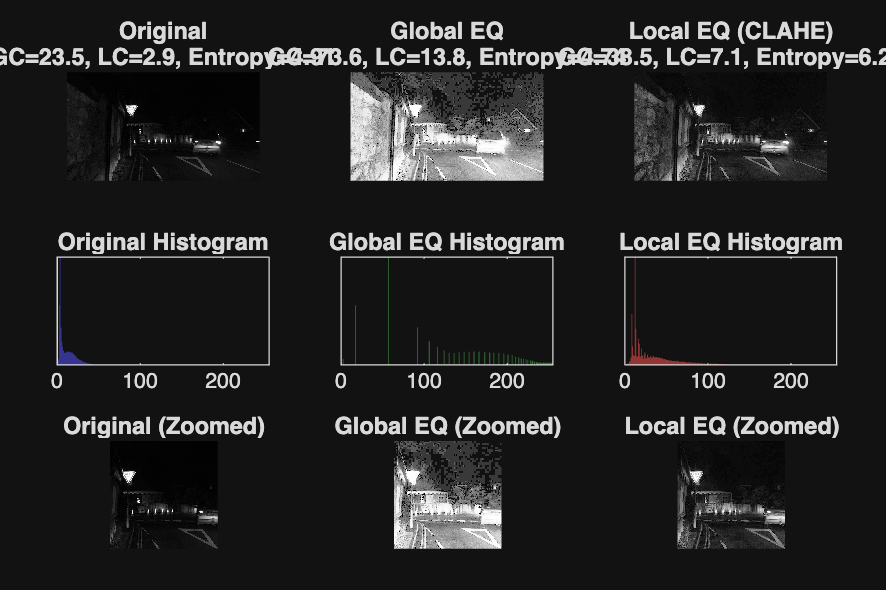

Saved results to dark_road_1_*.png


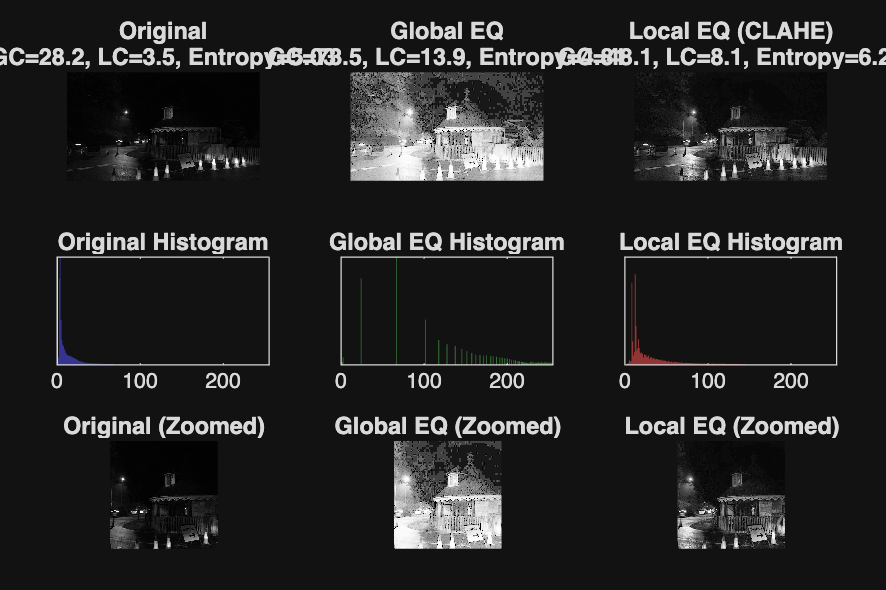

Saved results to dark_road_2_*.png


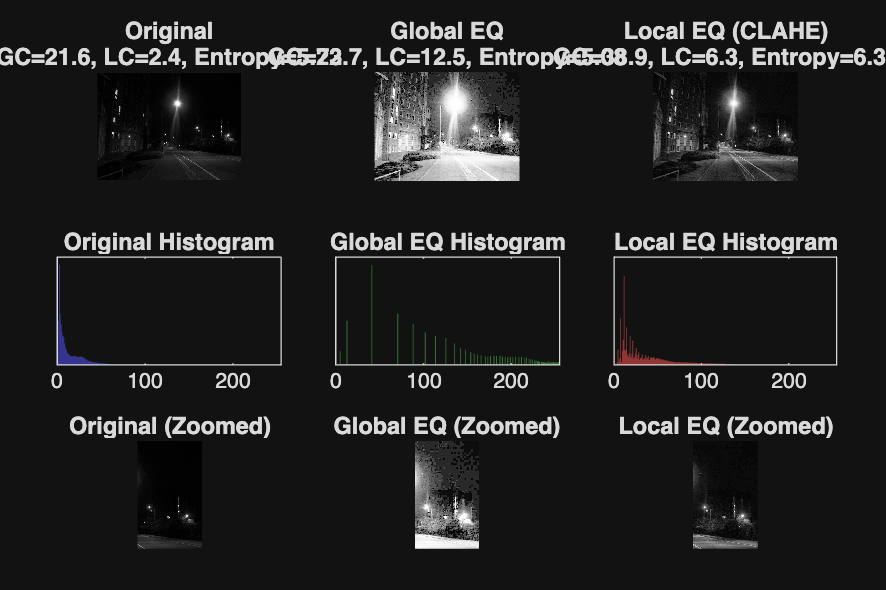

Saved results to dark_road_3_*.png

In [6]:
    figure('Name', ['Histogram Equalization - ' imgNames{k}], 'Position', [50, 50, 1200, 800]);

    % 3×3 grid: top row = images, middle row = histograms, bottom row = zoomed regions
    tiledlayout(3, 3, 'Padding', 'compact', 'TileSpacing', 'compact');

    % Top row: Images
    ax1 = nexttile; imshow(uint8(I)); title('Original');
    ax2 = nexttile; imshow(I_global); title('Global Equalization');
    ax3 = nexttile; imshow(I_local); title('Local Equalization (CLAHE)');

    % Middle row: Histograms
    ax4 = nexttile;
    histogram(ax4, I(:), numBins, 'FaceColor', [0.3 0.3 0.9], 'EdgeColor', 'none');
    ax4.XLim = [0 255]; ax4.YTick = []; title('Original Histogram');

    ax5 = nexttile;
    histogram(ax5, I_global(:), numBins, 'FaceColor', [0.3 0.7 0.3], 'EdgeColor', 'none');
    ax5.XLim = [0 255]; ax5.YTick = []; title('Global EQ Histogram');

    ax6 = nexttile;
    histogram(ax6, I_local(:), numBins, 'FaceColor', [0.9 0.3 0.3], 'EdgeColor', 'none');
    ax6.XLim = [0 255]; ax6.YTick = []; title('Local EQ Histogram');

    % Find interesting region for zoom (darkest 400×400 region)
    % This helps to highlight the differences in dark regions
    I_blocks = im2col(I, [400, 400], 'distinct');
    [~, min_idx] = min(mean(I_blocks, 1));
    [rows, cols] = ind2sub(floor(size(I) ./ [400, 400]), min_idx);
    rows = (rows-1)*400 + 1 : min(rows*400, size(I,1));
    cols = (cols-1)*400 + 1 : min(cols*400, size(I,2));

    % If the image is too small for 400×400 blocks, just use the center
    if isempty(rows) || isempty(cols)
        center_r = floor(size(I,1)/2);
        center_c = floor(size(I,2)/2);
        rows = max(1, center_r-200) : min(size(I,1), center_r+199);
        cols = max(1, center_c-200) : min(size(I,2), center_c+199);
    end

    % Bottom row: Zoomed regions
    ax7 = nexttile; imshow(uint8(I(rows, cols, :))); title('Original (Zoomed)');
    ax8 = nexttile; imshow(I_global(rows, cols, :)); title('Global EQ (Zoomed)');
    ax9 = nexttile; imshow(I_local(rows, cols, :)); title('Local EQ (Zoomed)');

    % Add metrics to titles
    title(ax1, sprintf('Original\nGC=%.1f, LC=%.1f, Entropy=%.2f', ...
        metrics_orig.global(k), metrics_orig.local(k), metrics_orig.entropy(k)));

    title(ax2, sprintf('Global EQ\nGC=%.1f, LC=%.1f, Entropy=%.2f', ...
        metrics_global.global(k), metrics_global.local(k), metrics_global.entropy(k)));

    title(ax3, sprintf('Local EQ (CLAHE)\nGC=%.1f, LC=%.1f, Entropy=%.2f', ...
        metrics_local.global(k), metrics_local.local(k), metrics_local.entropy(k)));

    % Save results if requested
    if save_results
        % Extract filename without extension
        [~, fname, ~] = fileparts(imgNames{k});
        saveas(gcf, [fname '_comparison.png']);
        imwrite(I_global, [fname '_global_eq.png']);
        imwrite(I_local, [fname '_local_eq.png']);
        fprintf('Saved results to %s_*.png\n', fname);
    end


## Test multiple window sizes for CLAHE if requested


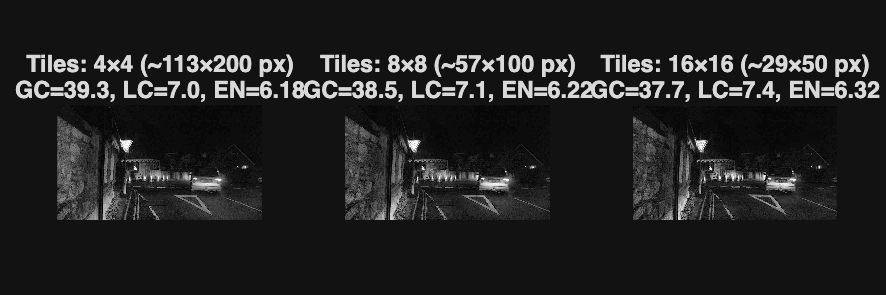


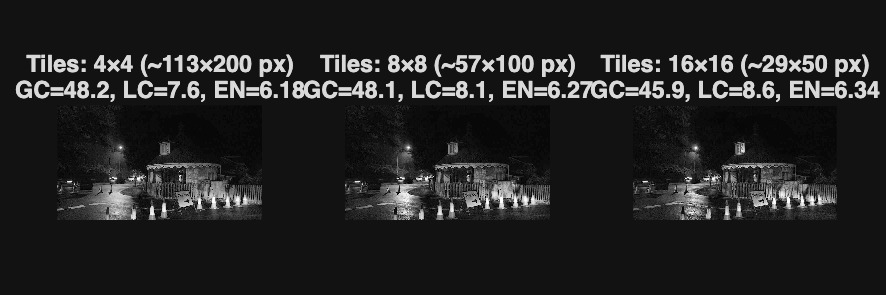

In [7]:
    if test_multiple_windows
        figure('Name', ['CLAHE Window Size Comparison - ' imgNames{k}], 'Position', [100, 100, 1200, 400]);
        tiledlayout(1, length(window_sizes), 'Padding', 'compact');

        for w = 1:length(window_sizes)
            tiles = window_sizes{w};
            approx_window = [ceil(size(I,1)/tiles(1)), ceil(size(I,2)/tiles(2))];

            % Apply CLAHE with current window size
            I_clahe = adapthisteq(uint8(I), 'NumTiles', tiles, ...
                              'ClipLimit', clipLimit, 'NBins', numBins);

            % Calculate metrics
            gc = global_contrast(I_clahe);
            lc = local_contrast(I_clahe);
            en = entropy_fn(I_clahe);

            % Display result
            ax = nexttile;
            imshow(I_clahe);
            title(sprintf('Tiles: %d×%d (~%d×%d px)\nGC=%.1f, LC=%.1f, EN=%.2f', ...
                tiles(1), tiles(2), approx_window(1), approx_window(2), gc, lc, en));
        end

        if save_results
            saveas(gcf, [fname '_window_comparison.png']);
        end
    end
end

<center>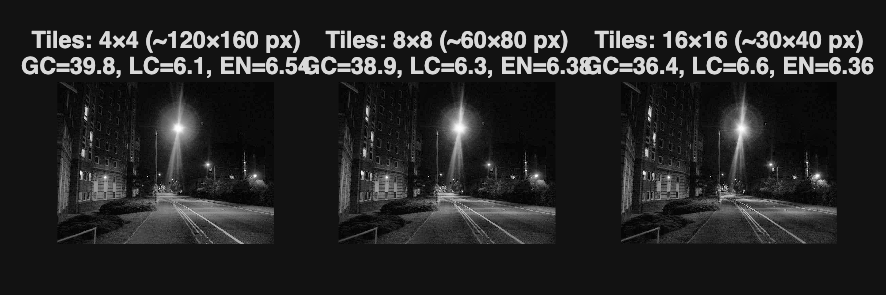</center>



In [8]:

% Print summary metrics
print_metrics(imgNames, metrics_orig, metrics_global, metrics_local);

=== Contrast Enhancement Metrics ===
+-----------------+----------------+----------------+----------------+
| Image           | Original       | Global EQ      | Local EQ       |
+-----------------+----------------+----------------+----------------+
| dark_road_1.jpg | GC:  73.6 (+213%) | GC:  38.5 ( +64%) |
|                 | LC:  13.8 (+372%) | LC:   7.1 (+144%) |
|                 | EN:  4.74 (  -3%) | EN:  6.22 ( +27%) |
+-----------------+----------------+----------------+----------------+
| dark_road_2.jpg | GC:  73.5 (+161%) | GC:  48.1 ( +71%) |
|                 | LC:  13.9 (+294%) | LC:   8.1 (+129%) |
|                 | EN:  4.81 (  -4%) | EN:  6.27 ( +25%) |
+-----------------+----------------+----------------+----------------+
| dark_road_3.jpg | GC:  73.7 (+241%) | GC:  38.9 ( +80%) |
|                 | LC:  12.5 (+417%) | LC:   6.3 (+162%) |
|                 | EN:  5.08 (  -3%) | EN:  6.38 ( +22%) |
+-----------------+----------------+----------------+---------------

In [9]:

% Print analysis
fprintf('\n=== Analysis Summary ===\n');

=== Analysis Summary ===

In [10]:
fprintf('1. Original images: Dark road scenes with limited visibility and poor contrast,\n');

1. Original images: Dark road scenes with limited visibility and poor contrast,

In [11]:
fprintf('   particularly in shadow areas. Histograms are concentrated in the lower range.\n\n');

   particularly in shadow areas. Histograms are concentrated in the lower range.

In [12]:

fprintf('2. Global histogram equalization: Significantly improves overall brightness and\n');

2. Global histogram equalization: Significantly improves overall brightness and

In [13]:
fprintf('   contrast by redistributing intensity values across the full range.\n');

   contrast by redistributing intensity values across the full range.

In [14]:
fprintf('   Works well for general scene visibility but may over-enhance some areas.\n\n');

   Works well for general scene visibility but may over-enhance some areas.

In [15]:

fprintf('3. Local histogram equalization (CLAHE): Enhances local contrast while limiting\n');

3. Local histogram equalization (CLAHE): Enhances local contrast while limiting

In [16]:
fprintf('   over-enhancement through clipping. Better preserves natural appearance while\n');

   over-enhancement through clipping. Better preserves natural appearance while

In [17]:
fprintf('   revealing details in dark regions. The window size affects the results:\n');

   revealing details in dark regions. The window size affects the results:

In [18]:
fprintf('   - Smaller windows (e.g., 4×4): More local detail but can look unnatural\n');

   - Smaller windows (e.g., 4x4): More local detail but can look unnatural

In [19]:
fprintf('   - Medium windows (e.g., 8×8): Good balance of local and global contrast\n');

   - Medium windows (e.g., 8x8): Good balance of local and global contrast

In [20]:
fprintf('   - Larger windows (e.g., 16×16): More similar to global equalization\n\n');

   - Larger windows (e.g., 16x16): More similar to global equalization

In [21]:

fprintf('Best approach for night driving assistance would likely be adaptive local\n');

Best approach for night driving assistance would likely be adaptive local

In [22]:
fprintf('histogram equalization with medium-sized windows, as it reveals important\n');

histogram equalization with medium-sized windows, as it reveals important

In [23]:
fprintf('road features without excessive noise or unnatural enhancement.\n');

road features without excessive noise or unnatural enhancement.